In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import os
import sys

C:\Users\user\Anaconda3\envs\tensorflow-CPU\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [174]:
# 計算相似矩陣
def cosine_similarity(ratings):
    sim = ratings.dot(ratings.T) # .T 為numpy 的轉置
    if not isinstance(sim, np.ndarray):
        sim = sim.toarray()
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)
    
def main():
    # 自 images 目錄找出所有 JPEG 檔案    
    y_test=[]
    x_test=[]
    for img_path in os.listdir("similarity"):
        if img_path.endswith(".jpg"):
            img = image.load_img("similarity/"+img_path, target_size=(224, 224))
            y_test.append(os.path.splitext(img_path)[0])
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            if len(x_test) > 0:
                x_test = np.concatenate((x_test,x))
            else:
                x_test=x
    
    # 轉成 VGG 的 input 格式
    x_test = preprocess_input(x_test)

    # include_top=False，表示會載入 VGG16 的模型，不包括加在最後3層的卷積層，通常是取得 Features (1,7,7,512)
    model = VGG16(weights='imagenet', include_top=False) 
    
    # 萃取特徵
    features = model.predict(x_test)
    # 計算相似矩陣
    features_compress = features.reshape(len(y_test),7*7*512) # numpy reshape 改變array
    sim = cosine_similarity(features_compress)

    # 隨機取1個樣本測試
    inputNo = np.random.randint(0,len(y_test),1)[0]
    print('隨機取第',inputNo+1,"樣本")
    top = np.argsort(-sim[inputNo], axis=0)[1:3]  #argsort函数返回的是数组值从小到大的索引值,#axis=0 按列排序, # 第2~3
    print(-sim[inputNo])
    
    # 取得最相似的前2名序號
    recommend = [y_test[i] for i in top]
    print("清單為:",y_test)
    print(y_test[inputNo],"與它相似的圖形有",recommend)

if __name__ == "__main__":
    main()

隨機取第 14 樣本
[-0.07927258 -0.07376449 -0.06698906 -0.08536506 -0.06974095 -0.14128281
 -0.21991342 -0.16084409 -0.218145   -0.2959209  -0.07979457 -0.30015504
 -0.1342987  -1.        ]
清單為: ['Cappuccino-2', 'Cappuccino-3', 'Cappuccino-4', 'Cappuccino', 'cat-2', 'cat-3', 'cat-4', 'cat-5', 'cat-6', 'cat', 'JINJIN', 'tiger-2', 'tiger-3', 'tiger']
tiger 與它相似的圖形有 ['tiger-2', 'cat']


In [175]:
import matplotlib.pyplot as plt
def plot_images_labels(images,labels,idx=0,num=4):
    fig = plt.gcf()
    fig.set_size_inches(14, 16)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary') #cmap='binary'
        title= "label=" +str(labels[idx])
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


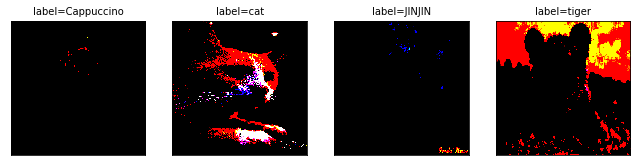

In [173]:
plot_images_labels(x_test,y_test)